# About

In here we have the option of reading the csv file and using it as the data. This is an easyer way to go strait into the data and start working on it.

However, for my study porpuse I will not use the csv file, but the PDF files and build my own dataset. Since my goal is to learn how to work with PDFs and NLP.

## Goal

The goal of this study is to explore the data read from the pdfs.

### Preprocessing

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pdfminer.high_level
import spacy
import os

Acklowledging how to get de subdirectorys name.

In [2]:
path = "./dados/data/"

subdirectories = [os.path.join(path, o) for o in os.listdir(path) if os.path.isdir(os.path.join(path,o))]
subdirectories

['./dados/data/ACCOUNTANT',
 './dados/data/ADVOCATE',
 './dados/data/AGRICULTURE',
 './dados/data/APPAREL',
 './dados/data/ARTS',
 './dados/data/AUTOMOBILE',
 './dados/data/AVIATION',
 './dados/data/BANKING',
 './dados/data/BPO',
 './dados/data/BUSINESS-DEVELOPMENT',
 './dados/data/CHEF',
 './dados/data/CONSTRUCTION',
 './dados/data/CONSULTANT',
 './dados/data/DESIGNER',
 './dados/data/DIGITAL-MEDIA',
 './dados/data/ENGINEERING',
 './dados/data/FINANCE',
 './dados/data/FITNESS',
 './dados/data/HEALTHCARE',
 './dados/data/HR',
 './dados/data/INFORMATION-TECHNOLOGY',
 './dados/data/PUBLIC-RELATIONS',
 './dados/data/SALES',
 './dados/data/TEACHER']

Reading all the pdfs in the subdirectorys and making the csv file.

In [3]:
def read_pdf(file_path):
    with open(file_path, "rb") as file:
        pdf = pdfminer.high_level.extract_text(file)
        return pdf
    
def read_files(path):
    data = {
        "unique_id": [],
        "text": [],
        "type": []
    }
    subdirectories = [os.path.join(path, o) for o in os.listdir(path) if os.path.isdir(os.path.join(path,o))]
    for subdir in subdirectories:
        for file in os.listdir(subdir):
            if file.endswith(".pdf"):
                data["unique_id"].append(file.split(".")[0])
                data["text"].append(read_pdf(os.path.join(subdir, file)))
                data["type"].append(subdir.split("/")[-1])
    
    return data

data = read_files(path)
df = pd.DataFrame(data)
df.head()

,unique_id,text,type
0,10554236,ACCOUNTANT\nSummary\n\nFinancial Accountant sp...,ACCOUNTANT
1,10674770,STAFF ACCOUNTANT\nSummary\nHighly analytical a...,ACCOUNTANT
2,11163645,ACCOUNTANT\nProfessional Summary\nTo obtain a ...,ACCOUNTANT
3,11759079,SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...,ACCOUNTANT
4,12065211,SENIOR ACCOUNTANT\nProfessional Summary\nSenio...,ACCOUNTANT


Save dataframe to csv file.

In [15]:
df.to_csv("data.csv", index=False)

Vizualizing the amout of each type of resume.

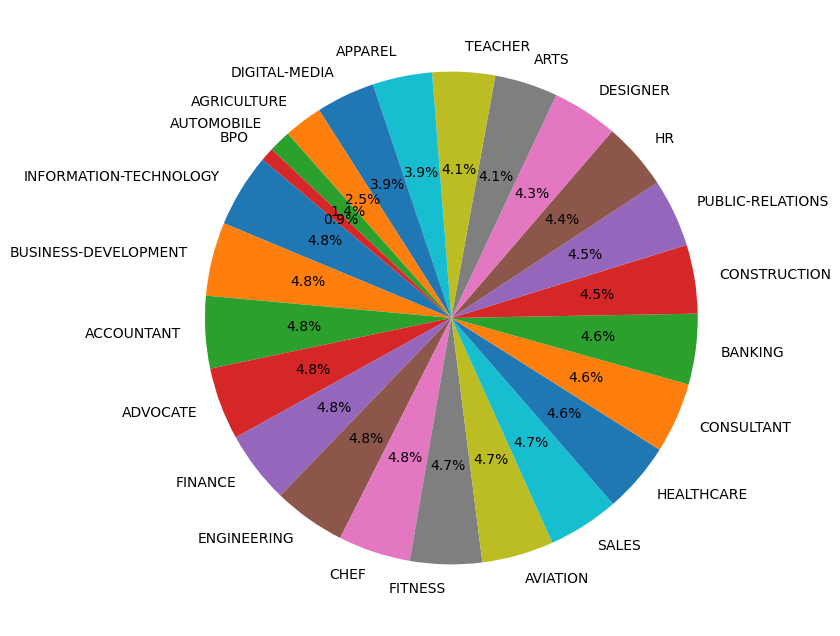

In [13]:
plt.figure(figsize=(10, 8))
plt.pie(df["type"].value_counts(), labels=df["type"].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.show()

Tokenizing the text.

In [5]:
nlp = spacy.load("en_core_web_sm")

df = df.assign(tokens = df["text"].apply(lambda x: nlp(x)))
df.head()

,unique_id,text,type,tokens
0,10554236,ACCOUNTANT\nSummary\n\nFinancial Accountant sp...,ACCOUNTANT,"(ACCOUNTANT, \n, Summary, \n\n, Financial, Acc..."
1,10674770,STAFF ACCOUNTANT\nSummary\nHighly analytical a...,ACCOUNTANT,"(STAFF, ACCOUNTANT, \n, Summary, \n, Highly, a..."
2,11163645,ACCOUNTANT\nProfessional Summary\nTo obtain a ...,ACCOUNTANT,"(ACCOUNTANT, \n, Professional, Summary, \n, To..."
3,11759079,SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...,ACCOUNTANT,"(SENIOR, ACCOUNTANT, \n, Experience, \n, Compa..."
4,12065211,SENIOR ACCOUNTANT\nProfessional Summary\nSenio...,ACCOUNTANT,"(SENIOR, ACCOUNTANT, \n, Professional, Summary..."


Extracting punctuation and stopwords.

In [6]:
def sanitize_text(text):
    sanitized_text = []
    for token in text:
        if token.is_alpha and not token.is_stop:
            sanitized_text.append(token)
    
    return sanitized_text

df = df.assign(sanitized_text = df["tokens"].apply(lambda x: sanitize_text(x)))
df.head()

,unique_id,text,type,tokens,sanitized_text
0,10554236,ACCOUNTANT\nSummary\n\nFinancial Accountant sp...,ACCOUNTANT,"(ACCOUNTANT, \n, Summary, \n\n, Financial, Acc...","[ACCOUNTANT, Summary, Financial, Accountant, s..."
1,10674770,STAFF ACCOUNTANT\nSummary\nHighly analytical a...,ACCOUNTANT,"(STAFF, ACCOUNTANT, \n, Summary, \n, Highly, a...","[STAFF, ACCOUNTANT, Summary, Highly, analytica..."
2,11163645,ACCOUNTANT\nProfessional Summary\nTo obtain a ...,ACCOUNTANT,"(ACCOUNTANT, \n, Professional, Summary, \n, To...","[ACCOUNTANT, Professional, Summary, obtain, po..."
3,11759079,SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...,ACCOUNTANT,"(SENIOR, ACCOUNTANT, \n, Experience, \n, Compa...","[SENIOR, ACCOUNTANT, Experience, Company, June..."
4,12065211,SENIOR ACCOUNTANT\nProfessional Summary\nSenio...,ACCOUNTANT,"(SENIOR, ACCOUNTANT, \n, Professional, Summary...","[SENIOR, ACCOUNTANT, Professional, Summary, Se..."
